In [ ]:
%pip install ipywidgets
%pip uninstall tensorflow
%pip install tensorflow
import pylab
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pickle
import os
import gzip


#ipywidgets의 경우 ctrl + shift + p > 터미널 열기 -> 를 통해 직접 인스톨했습니다.
#tensorflow 모듈이 불러오지 않을경우 해당 모듈을 삭제하고 tensorflow만 재설치하는 작업을 진행했습니다.

In [ ]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

mnist_image_file = './t10k-images-idx3-ubyte.gz'
mnist_label_file = './t10k-labels-idx1-ubyte.gz'

def load_mnist_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
        data = data.reshape(-1, 28, 28)  
    return data

def load_mnist_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

# MNIST 데이터 로드
images = load_mnist_images(mnist_image_file)
labels = load_mnist_labels(mnist_label_file)

# 데이터 형태 확인
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

# 이미지 시각화
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()


주어진 이미지 10000개와 28 * 28 픽셀, 레이블 10000개를 잘 인식함.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 데이터 준비
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)) / 255.0

# 모델 구축
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 훈련
history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2)

# 훈련 과정 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


분석 : 
총 파라미터 개수: 347,146

훈련 가능한 파라미터: 347,146

비훈련 가능한 파라미터: 0 

1/5 epoch (학습 횟수) 간 메모리 부족 현상 발견
첫 번째 epoch에서 훈련 정확도는 약 79.6%이고, 훈련 손실은 약 0.5877
검증 세트에 대한 정확도는 약 87.45%이고, 검증 세트에 대한 손실은 약 0.3409
에폭이 진행됨에 따라 훈련 정확도는 상승하고 손실은 감소하는 경향을 보임
마지막 에폭에서 훈련 정확도는 약 93.3%이고, 훈련 손실은 약 0.1800
검증 세트에 대한 정확도는 약 91.01%이고, 검증 세트에 대한 손실은 약 0.2589

모델은 초기에는 훈련 세트에 대해 상당한 정확도를 보여주지만, 에폭이 진행됨에 따라 과적합되는 경향을 보이는중.
이는 훈련 손실이 감소하면서 훈련 정확도가 증가하지만, 검증 세트에 대한 성능이 향상되지 않거나 약간 감소하는 것으로 보임
모델이 훈련 데이터에 과적합되었을 가능성이 있을거라 생각.

 20/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9028 - loss: 0.3112   

2024-04-17 13:32:46.205834: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9005 - loss: 0.2847
테스트 손실: 0.274261474609375
테스트 정확도: 0.9014999866485596
 37/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

2024-04-17 13:32:47.366223: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


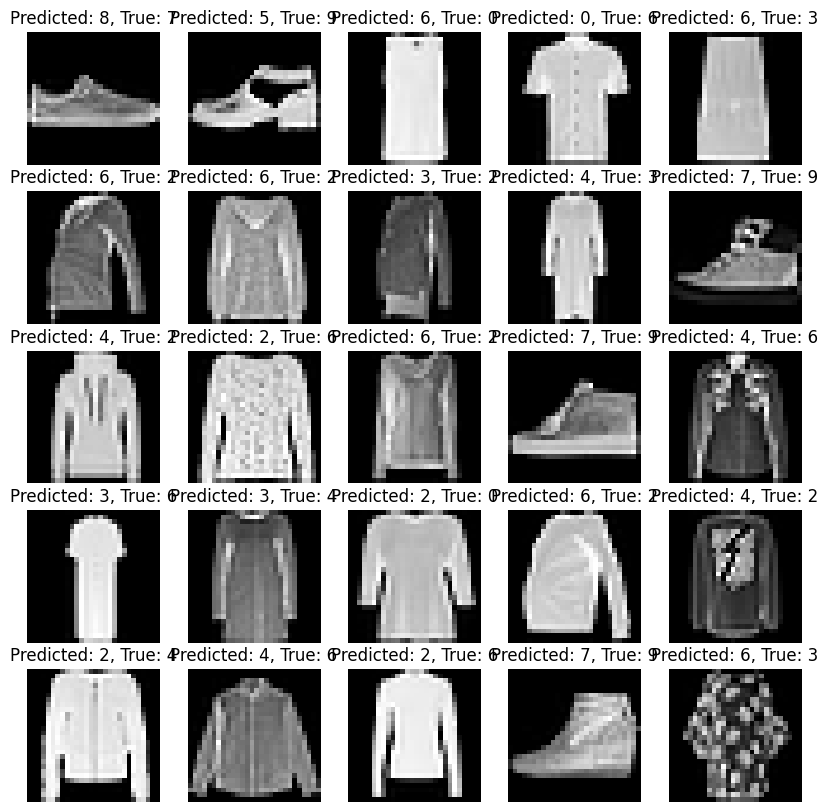

잘못 분류된 클래스:
실제 클래스 7가 8(으)로 잘못 분류된 이미지 수: 1
실제 클래스 7가 5(으)로 잘못 분류된 이미지 수: 7
실제 클래스 7가 9(으)로 잘못 분류된 이미지 수: 7
실제 클래스 9가 5(으)로 잘못 분류된 이미지 수: 5
실제 클래스 9가 7(으)로 잘못 분류된 이미지 수: 96
실제 클래스 9가 4(으)로 잘못 분류된 이미지 수: 1
실제 클래스 9가 6(으)로 잘못 분류된 이미지 수: 1
실제 클래스 0가 6(으)로 잘못 분류된 이미지 수: 159
실제 클래스 0가 2(으)로 잘못 분류된 이미지 수: 13
실제 클래스 0가 8(으)로 잘못 분류된 이미지 수: 12
실제 클래스 0가 3(으)로 잘못 분류된 이미지 수: 28
실제 클래스 0가 5(으)로 잘못 분류된 이미지 수: 1
실제 클래스 0가 4(으)로 잘못 분류된 이미지 수: 1
실제 클래스 6가 0(으)로 잘못 분류된 이미지 수: 58
실제 클래스 6가 2(으)로 잘못 분류된 이미지 수: 46
실제 클래스 6가 4(으)로 잘못 분류된 이미지 수: 70
실제 클래스 6가 3(으)로 잘못 분류된 이미지 수: 23
실제 클래스 6가 8(으)로 잘못 분류된 이미지 수: 7
실제 클래스 6가 1(으)로 잘못 분류된 이미지 수: 1
실제 클래스 3가 6(으)로 잘못 분류된 이미지 수: 39
실제 클래스 3가 4(으)로 잘못 분류된 이미지 수: 41
실제 클래스 3가 1(으)로 잘못 분류된 이미지 수: 10
실제 클래스 3가 8(으)로 잘못 분류된 이미지 수: 3
실제 클래스 3가 0(으)로 잘못 분류된 이미지 수: 6
실제 클래스 3가 2(으)로 잘못 분류된 이미지 수: 8
실제 클래스 2가 6(으)로 잘못 분류된 이미지 수: 71
실제 클래스 2가 3(으)로 잘못 분류된 이미지 수: 8
실제 클래스 2가 4(으)로 잘못 분류된 이미지 수: 67
실제 클래스 2가 0(으)로 잘못 분류된 이미지 수: 10
실제 클래스 2가 1(으)로 잘못 분류된 이미지 수: 2
실제 클래스 2가 8(

In [10]:
# 모델 평가
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"테스트 손실: {test_loss}")
print(f"테스트 정확도: {test_accuracy}")

# 잘못 분류된 이미지 분석
predictions = model.predict(test_images)
misclassified_images = []
misclassified_labels = []
correct_labels = []
for i in range(len(test_images)):
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label != true_label:
        misclassified_images.append(test_images[i])
        misclassified_labels.append(predicted_label)
        correct_labels.append(true_label)

# 잘못 분류된 이미지 시각화
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(misclassified_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {misclassified_labels[i]}, True: {correct_labels[i]}")
    plt.axis('off')
plt.show()

# 잘못 분류된 클래스 식별
misclassified_classes = {}
for true_label, predicted_label in zip(correct_labels, misclassified_labels):
    if true_label not in misclassified_classes:
        misclassified_classes[true_label] = {}
    if predicted_label not in misclassified_classes[true_label]:
        misclassified_classes[true_label][predicted_label] = 0
    misclassified_classes[true_label][predicted_label] += 1

# 잘못 분류된 클래스 출력
print("잘못 분류된 클래스:")
for true_label, predicted_labels in misclassified_classes.items():
    for predicted_label, count in predicted_labels.items():
        print(f"실제 클래스 {true_label}가 {predicted_label}(으)로 잘못 분류된 이미지 수: {count}")


분석 : 
가장 잘못 분류된 클래스: 클래스 9 -> 96번 클래스로 분류되는 오류
클래스 간 잘못 분류 비율: 클래스 9 -> 7, 5 4 등으로 분류되는 오류
클래스 9와 클래스 0, 6은 다른 클래스로 자주 잘못 분류되는 경향이 있음. 추측컨데 9를 뒤집거나 약간의 픽셀이 튀어 0으로 채우는 오류로 파악됌